In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [114]:
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [14]:
# Importing Data
data_train = pd.read_csv('C:/Users/vladislav/Desktop/DL A-Z/Google_Stock_Price_Train.csv')
training_set = data_train.iloc[:,1:2].values # we need to provide a range from 1:2 because 2 will be excluded 

Now we need to transform training_set for a neural net 

There are several ways to do that:
* Standardisation
* Mormalisation

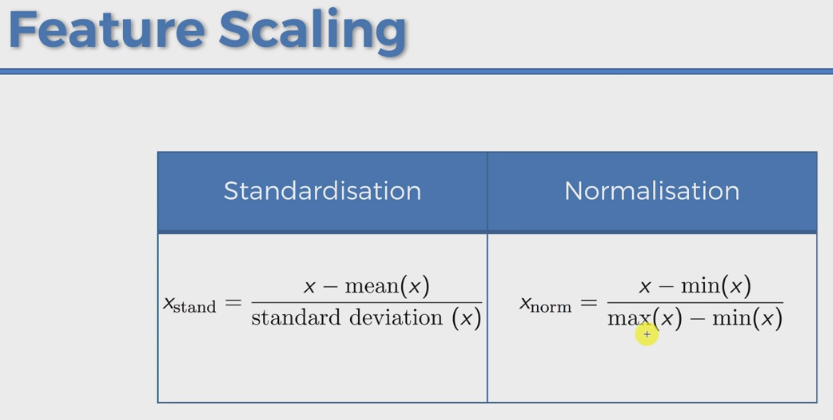

Recommendations:
* Normalisation is better for RNN especially with sigmoid activation func

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
# fit - appy only min and max operations
# fit_transform - apply the formula

We need a special data structure for RNN

At each time t it will be looking several timesteps back (need to experiment in order to find a proper timestep) and based on the previous info it will be predicting the next output

* In our case timestep = 60 (t-1)
* 1 output (t)

It memorizes what was happening 60 previous timesteps to predict the next value

In [33]:
x_train = []
y_train = []

for i in range(60,len(scaled_training_set)):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
    
# Make NumPy array from lists 
x_train, y_train = np.array(x_train),np.array(y_train)

In [38]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1) )

In [45]:
# Building RNN Architecture
model = Sequential()

# If we stack several layes we need to provide return_sequence=True
# Plus we need to provide input_shape but only for the first layer

# First Layer
model.add(LSTM(units=50,
              return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

# Second Layer 
model.add(LSTM(units=50,
              return_sequences=True))
model.add(Dropout(0.2))

# Third Layer
model.add(LSTM(units=50,
              return_sequences=True))
model.add(Dropout(0.2))

# Forth Layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output Layer 
model.add(Dense(units=1))

It is crucial to choose proper optimizer for a Neural Net

Different Neural Nets need different optimizers so experiments it the best way to achive the best results

For RNN 
* RMSprop
* Adam 

As a loss func we use MSE as it is regression problem

In [46]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)               

In [47]:
model.fit(x_train,y_train,epochs=150,batch_size=32)

Epoch 1/150
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0398
Epoch 2/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0074
Epoch 3/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0058
Epoch 4/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 5/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 6/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 7/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0042
Epoch 8/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 9/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 10/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 11/150
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0042
Epoch 12/150
1198/1198 [============================

1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015
Epoch 96/150
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0013
Epoch 97/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 98/150
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0013
Epoch 99/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 100/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017A: 1s - loss: 
Epoch 101/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 102/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014A: 2s 
Epoch 103/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 104/150
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 105/150
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015
Epoch 106/150
1198/1198 [===========================

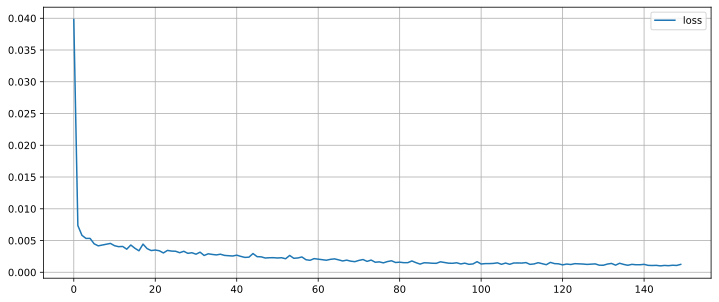

In [121]:
model_loss = model.history.history['loss']
plt.figure(figsize=(12, 5))
plt.plot(model_loss,label='loss')
plt.legend()
plt.grid(True)

In [102]:
# Real Stock Price 
data_test = pd.read_csv('C:/Users/vladislav/Desktop/DL A-Z/Google_Stock_Price_Test.csv')
real_price = data_test.iloc[:,1:2].values

In [103]:
all_data = pd.concat((data_train['Open'], data_test['Open']), axis=0)
input_vector = all_data[len(all_data) - len(data_test) - 60:].values # to get 80 values for predicting 20
input_vector = input_vector.reshape(-1,1) # to make a column format instead of lines
# scaling inputs 
# we must not use fit_transform method because the object has already been fitted and we need
# to use the same scaling on which we trained our RNN
input_vector = scaler.transform(input_vector)

In [117]:
x_test = []
for i in range(60,len(input_vector)):
    x_test.append(input_vector[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

error = round(mean_absolute_percentage_error(real_price,predicted_price),2)

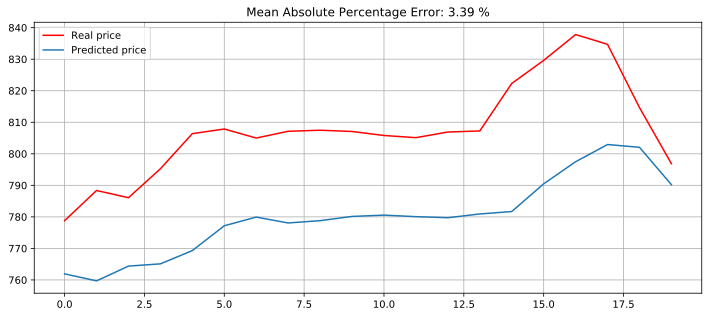

In [122]:
plt.figure(figsize=(12,5))
plt.title(f"Mean Absolute Percentage Error: {error} %")
plt.plot(real_price, color = 'r',label='Real price')
plt.plot(predicted_price,label='Predicted price')
plt.legend()
plt.grid(True)